<a href="https://colab.research.google.com/github/Yoshikawawawa/GoogleColab/blob/main/%E6%84%9F%E6%83%85%E5%88%86%E6%9E%90%E8%AA%AD%E3%81%BF%E8%BE%BC%E3%82%93%E3%81%A7%E4%BD%BF%E3%81%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

In [ ]:
!apt-get -y install fonts-ipafont-gothic
!rm /root/.cache/matplotlib/fontlist-v310.json
!pip install japanize-matplotlib
! pip install transformers datasets
! pip install fugashi ipadic
!pip install sentencepiece
from google.colab import drive
drive.mount('/content/drive')

# 読み込んで使ってみる

In [2]:
#from
from transformers import AutoTokenizer, AutoModelForSequenceClassification
new_tokenizer = AutoTokenizer\
    .from_pretrained(f"/content/drive/MyDrive")#保存場所のパスをいれる

new_model = AutoModelForSequenceClassification\
    .from_pretrained(f"/content/drive/MyDrive")#保存場所のパスを入れる

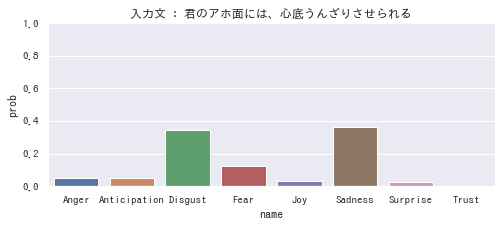

In [5]:
from pandas.io.parsers.readers import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib 
import numpy as np
import pandas as pd
# ソフトマックス関数
# https://www.delftstack.com/ja/howto/numpy/numpy-softmax/
 
def np_softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

def analyze_emotion(text, show_fig=True):
    # 推論モードを有効化
    new_model.eval()

    # 入力データ変換 + 推論
    tokens = new_tokenizer(text, truncation=True, return_tensors="pt")
    tokens.to(new_model.device)
    preds = new_model(**tokens)
    prob = np_softmax(preds.logits.cpu().detach().numpy()[0])
    emotion_names = ['Anger','Anticipation','Disgust','Fear','Joy','Sadness','Surprise','Trust']
    out_dict = {n: p for n, p in zip(emotion_names, prob)}

    # 棒グラフを描画
    if show_fig:
        sns.set(font="IPAGothic")
        plt.figure(figsize=(8, 3))
        plt.ylim(0, 1.0)
        df = pd.DataFrame(out_dict.items(), columns=['name', 'prob'])
        sns.barplot(x='name', y='prob', data=df)
        plt.title('入力文 : ' + text,fontname="IPAGothic")
    else:
        print(out_dict)
#テキスト入力
analyze_emotion("君のアホ面には、心底うんざりさせられる")
#plotの文字化けは再起動で直る可能性が高い